In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

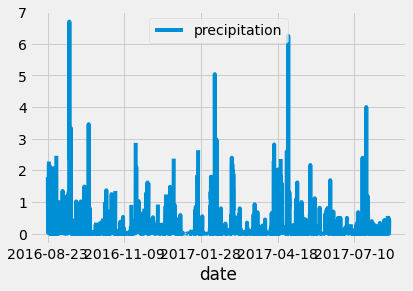

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


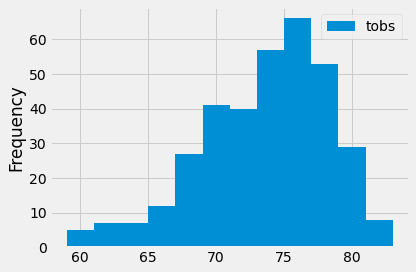

In [16]:
df.plot.hist(bins=12)
plt.tight_layout()

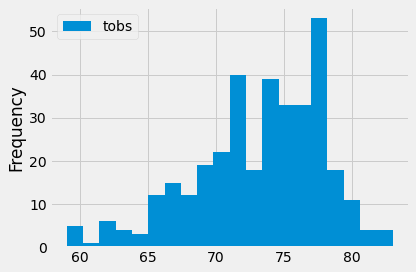

In [17]:
df.plot.hist(bins=20)
plt.tight_layout()

In [18]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

In [37]:
# Performs percipitation data query filter for June
results = []
results = session.query(Measurement.date, Measurement.prcp)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
df.date = pd.to_datetime(df.date)
june_df = df[df.date.dt.month == 6]
print(june_df.to_string(index=False))

      date  precipitation
2010-06-01           0.00
2010-06-01           0.03
2010-06-01           0.01
2010-06-01           0.00
2010-06-01           0.08
2010-06-01           0.00
2010-06-01            NaN
2010-06-01           0.03
2010-06-01           0.00
2010-06-02           0.03
2010-06-02           0.00
2010-06-02           0.00
2010-06-02           0.01
2010-06-02           0.00
2010-06-02           0.00
2010-06-02           0.03
2010-06-02           0.00
2010-06-02           0.00
2010-06-03           0.00
2010-06-03           0.00
2010-06-03           0.00
2010-06-03           0.14
2010-06-03           0.00
2010-06-03           0.00
2010-06-03           0.10
2010-06-03           0.00
2010-06-03           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.01
2010-06-05           0.00
2010-06-05  

In [42]:
june_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


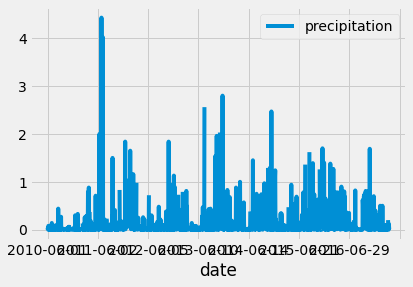

In [55]:
june_df.plot()

In [57]:
# Performs tobs data query filter for June
results = []
results = session.query(Measurement.date, Measurement.tobs)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','temperature'])
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
df.date = pd.to_datetime(df.date)
june_df = df[df.date.dt.month == 6]
print(june_df.to_string(index=False))

      date  temperature
2010-06-01         74.0
2010-06-01         76.0
2010-06-01         73.0
2010-06-01         71.0
2010-06-01         70.0
2010-06-01         77.0
2010-06-01         69.0
2010-06-01         74.0
2010-06-01         78.0
2010-06-02         71.0
2010-06-02         72.0
2010-06-02         76.0
2010-06-02         76.0
2010-06-02         76.0
2010-06-02         76.0
2010-06-02         70.0
2010-06-02         78.0
2010-06-02         76.0
2010-06-03         72.0
2010-06-03         78.0
2010-06-03         75.0
2010-06-03         77.0
2010-06-03         74.0
2010-06-03         67.0
2010-06-03         73.0
2010-06-03         78.0
2010-06-03         76.0
2010-06-04         73.0
2010-06-04         75.0
2010-06-04         74.0
2010-06-04         73.0
2010-06-04         72.0
2010-06-04         76.0
2010-06-04         75.0
2010-06-04         70.0
2010-06-04         68.0
2010-06-05         74.0
2010-06-05         78.0
2010-06-05         72.0
2010-06-05         79.0
2010-06-05      

In [58]:
june_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [48]:
# Performs percipitation data query filter for December
results = []
results = session.query(Measurement.date, Measurement.prcp)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
df.date = pd.to_datetime(df.date)
december_df = df[df.date.dt.month == 12]
print(december_df.to_string(index=False))

      date  precipitation
2010-12-01           0.13
2010-12-01           0.04
2010-12-01           0.76
2010-12-01           1.35
2010-12-01           1.48
2010-12-01           0.70
2010-12-01           0.03
2010-12-01           0.03
2010-12-02           0.00
2010-12-02           0.18
2010-12-02           0.16
2010-12-02           0.13
2010-12-02           0.26
2010-12-02           0.02
2010-12-02            NaN
2010-12-02           0.06
2010-12-03           0.01
2010-12-03           0.47
2010-12-03           0.00
2010-12-03           0.01
2010-12-03           0.22
2010-12-03           0.78
2010-12-03           1.59
2010-12-03           0.16
2010-12-04           0.00
2010-12-04           0.00
2010-12-04           0.00
2010-12-04           0.00
2010-12-04           0.19
2010-12-04           0.00
2010-12-04           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05            NaN
2010-12-05           0.00
2010-12-05  

In [40]:
december_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


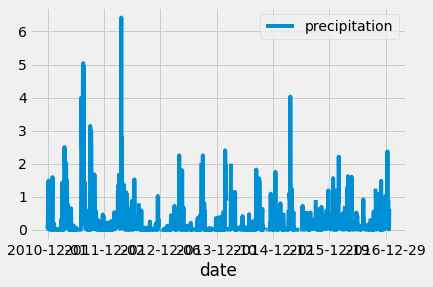

In [56]:
december_df.plot()

In [59]:
# Performs temperature data query filter for December
results = []
results = session.query(Measurement.date, Measurement.tobs)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','temperature'])
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
df.date = pd.to_datetime(df.date)
december_df = df[df.date.dt.month == 12]
print(december_df.to_string(index=False))

      date  temperature
2010-12-01         70.0
2010-12-01         76.0
2010-12-01         73.0
2010-12-01         72.0
2010-12-01         71.0
2010-12-01         72.0
2010-12-01         78.0
2010-12-01         73.0
2010-12-02         74.0
2010-12-02         70.0
2010-12-02         71.0
2010-12-02         72.0
2010-12-02         75.0
2010-12-02         74.0
2010-12-02         71.0
2010-12-02         73.0
2010-12-03         74.0
2010-12-03         72.0
2010-12-03         74.0
2010-12-03         74.0
2010-12-03         71.0
2010-12-03         70.0
2010-12-03         67.0
2010-12-03         73.0
2010-12-04         72.0
2010-12-04         75.0
2010-12-04         74.0
2010-12-04         78.0
2010-12-04         77.0
2010-12-04         74.0
2010-12-04         74.0
2010-12-05         78.0
2010-12-05         69.0
2010-12-05         71.0
2010-12-05         73.0
2010-12-05         73.0
2010-12-05         69.0
2010-12-05         66.0
2010-12-06         61.0
2010-12-06         78.0
2010-12-06      

In [60]:
december_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [ ]:
# Written Analysis
# This analysis compares precipitation data for the months of June and December from the data provided in "hawaii.sqlite"
# Firstly, it is concluded that there are 169 more days of rain accounted for in June versus December when looking at the count of data entries across both months.
# Therefore, it is more likely to have a rainy day in June versus December
# December has a higher average amount of precepitation and also has a higher standard deviation.
# Therefore, we can conclude that June has more rainy days but they average closer to the mean of .14
# while December has less rainy days but a higher average amount of precipitation when it does rain with a mean of .22.
# The mean temperature for June and December is 75 and 71 degrees Fahrenheit respectively.
# There is not much of a temperature difference between the two months which is ideal for business.
# For further analysis I would recommend grouping by station and comparing precipitation and temperature statistics across each station.
# I would also recommend comparing other months of the season such as January and July.